In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/stefan/.conda/envs/thesis/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def loss_field(exp, taus, N = 200):
    phis = np.linspace(0, 1, N)
    losses = np.zeros((N, N))
    j = 0
    for phi1 in phis:
        i = 0
        for phi2 in phis:
            exp.reset()
            exp.run_all([phi1, phi2], taus)
            losses[i, j] = exp.loss()
            i += 1
        j += 1
    X, Y = np.meshgrid(phis, phis)
    
    return X, Y, losses

def average_over_equal_intervals(arr, interval):
    return np.mean(arr.reshape(-1, interval), axis=1)

## OneSet(Tau)

In [3]:
data_dist_singl = np.load("../results/distribution_single_perf_vs_n_steps.npz")
data_dist_singl_tau = np.load("../results/distribution_single_delta_tau_perf_vs_n_steps.npz")

In [4]:
frame_8 = (
    pd.DataFrame(data_dist_singl["nr_analytes_8"].T, columns=[str(i) for i in range(1, 11)])
    .stack()
    .reset_index()
    .drop(columns=['level_0'])
)
frame_16 = (
    pd.DataFrame(data_dist_singl["nr_analytes_16"].T, columns=[str(i) for i in range(1, 11)])
    .stack()
    .reset_index()
    .drop(columns=['level_0'])
)
frame_32 = (
    pd.DataFrame(data_dist_singl["nr_analytes_32"].T, columns=[str(i) for i in range(1, 11)])
    .stack()
    .reset_index()
    .drop(columns=['level_0'])
)

frame_8.columns = frame_16.columns = frame_32.columns = ['Nr_steps', 'Loss']


frame_8["Nr_analytes"] = '8 analytes'
frame_16["Nr_analytes"] = '16 analytes'
frame_32["Nr_analytes"] = '32 analytes'
frame_simple = pd.concat([frame_8, frame_16, frame_32])
frame_simple["Model_type"] = "OneSet"

frame_8_tau = (
    pd.DataFrame(data_dist_singl_tau["nr_analytes_8"].T, columns=[str(i) for i in range(2, 10)])
    .stack()
    .reset_index()
    .drop(columns=['level_0'])
)
frame_16_tau = (
    pd.DataFrame(data_dist_singl_tau["nr_analytes_16"].T, columns=[str(i) for i in range(2, 10)])
    .stack()
    .reset_index()
    .drop(columns=['level_0'])
)
frame_32_tau = (
    pd.DataFrame(data_dist_singl_tau["nr_analytes_32"].T, columns=[str(i) for i in range(2, 10)])
    .stack()
    .reset_index()
    .drop(columns=['level_0'])
)

frame_8_tau.columns = frame_16_tau.columns = frame_32_tau.columns = ['Nr_steps', 'Loss']


frame_8_tau["Nr_analytes"] = '8 analytes'
frame_16_tau["Nr_analytes"] = '16 analytes'
frame_32_tau["Nr_analytes"] = '32 analytes'
frame_simple_tau = pd.concat([frame_8_tau, frame_16_tau, frame_32_tau])
frame_simple_tau["Model_type"] = "OneSetTau"
data_frame = pd.concat([frame_simple, frame_simple_tau], sort=False)

### OneSet vs OneSetTau plots

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


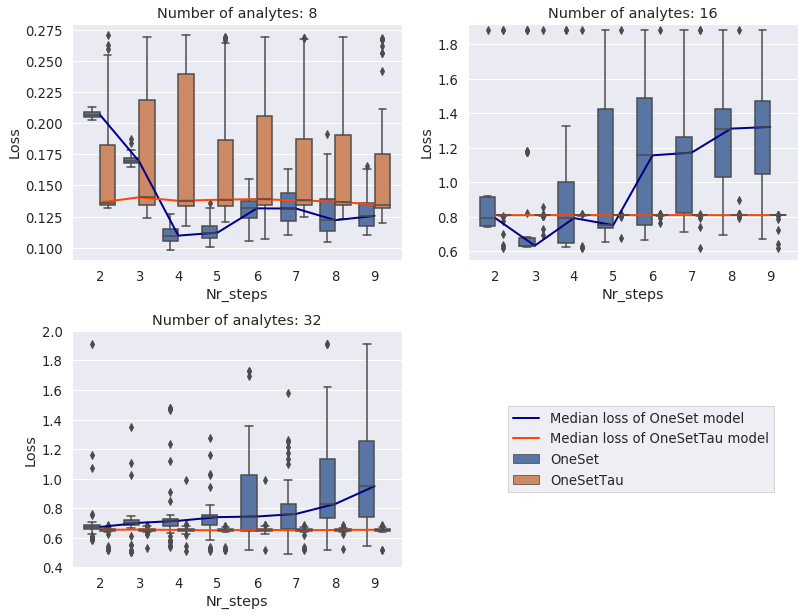

In [8]:
plt.rcParams.update({'font.size': 30, 'figure.figsize' : (13, 10)})
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
lims = [(0,0), (0,2), (1,0)]
func = np.median
for i in range(3):
    my_set = 8 * 2**i
    ax = plt.subplot2grid(shape=(2,4), loc=lims[i], colspan=2)
    (
        sns.boxplot(
            data=data_frame[(data_frame.Nr_analytes == f"{my_set} analytes") & (~data_frame.Nr_steps.isin(['1', '10']))], 
            hue='Model_type', 
            x='Nr_steps', 
            y='Loss', 
            #showfliers=True,
            order=[str(i) for i in range(2, 10)]
        )
    )

    (
        plt.plot(
            range(0, 8), 
            func(data_dist_singl[f"nr_analytes_{my_set}"], 1)[1:-1], 
            label="Median loss of OneSet model", 
            linewidth=2., 
            color="darkblue")
    )
    (
        plt.plot(
            range(0, 8), 
            func(data_dist_singl_tau[f"nr_analytes_{my_set}"], 1), 
            label="Median loss of OneSetTau model", 
            linewidth=2.,
            color='orangered'
        )
    )
    if my_set == 8:
        plt.ylim((0.09, 0.28))
    if my_set == 16:
        plt.ylim((0.55, 1.92))
    if my_set == 32:
        plt.ylim((0.4, 2.))
    if i == 2:
        plt.legend(loc='center left', bbox_to_anchor=(1.3, .5),
              ncol=1, fancybox=False, shadow=False)
    else:
        ax.get_legend().remove()
    plt.title(f"Number of analytes: {my_set}")
plt.subplots_adjust(wspace=.5, hspace=0.3)
#plt.title(f"Distribution of final results for a set of {my_set} analytes")
#plt.savefig(f"../results/graphs/OneSet_vs_OneSetTau/OneSet_vs_OneSetTau.png")
plt.savefig(f"../results/graphs/OneSet_vs_OneSetTau/OneSet_vs_OneSetTau.eps", format='eps',  bbox_inches='tight')

### OneSet vs nr_steps plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


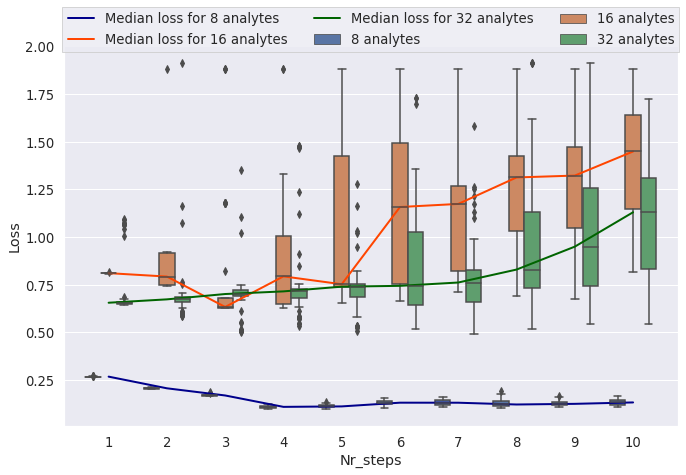

In [12]:
plt.rcParams.update({'font.size': 30, 'figure.figsize' : (11, 7)})
func = np.median
ax = plt.subplot(111)
(
    sns.boxplot(
        data=data_frame[(data_frame.Model_type == 'OneSet')], 
        hue='Nr_analytes', 
        x='Nr_steps', 
        y='Loss', 
        #showfliers=False,
        order=[str(i) for i in range(1, 11)]
    )
)
(
    plt.plot(
        range(0, 10), 
        func(data_dist_singl[f"nr_analytes_{8}"], 1), 
        label="Median loss for 8 analytes", 
        linewidth=2., 
        color="darkblue")
)
(
    plt.plot(
        range(0, 10), 
        func(data_dist_singl[f"nr_analytes_{16}"], 1), 
        label="Median loss for 16 analytes", 
        linewidth=2., 
        color="orangered")
)
(
    plt.plot(
        range(0, 10), 
        func(data_dist_singl[f"nr_analytes_{32}"], 1), 
        label="Median loss for 32 analytes", 
        linewidth=2., 
        color="darkgreen")
)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
              ncol=3, fancybox=False, shadow=False)
#plt.title("Distribution of final results with constant delta tau(OneSet)")
#plt.savefig(f"../results/graphs/OneSet_vs_nr_steps/OneSet_vs_nr_steps_outliers.png")
plt.savefig(f"../results/graphs/OneSet_vs_nr_steps/OneSet_vs_nr_steps_outliers.eps", format='eps')

### OneSetTau vs nr_steps plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


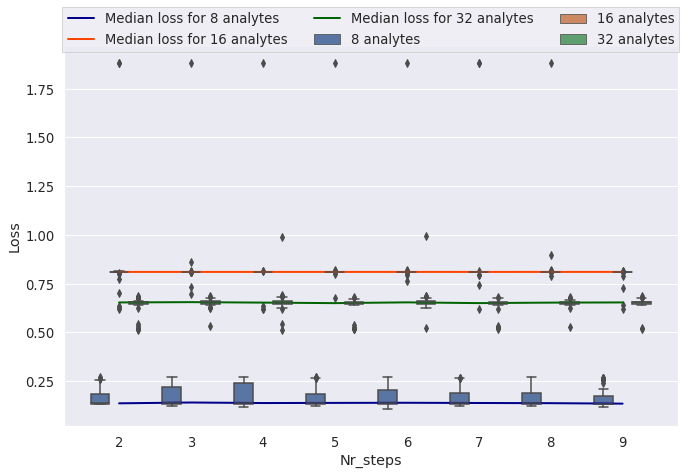

In [14]:
plt.rcParams.update({'font.size': 30, 'figure.figsize' : (11, 7)})
func = np.median
ax = plt.subplot(111)
(
    sns.boxplot(
        data=data_frame[(data_frame.Model_type == 'OneSetTau')], 
        hue='Nr_analytes', 
        x='Nr_steps', 
        y='Loss', 
        #showfliers=True,
        order=[str(i) for i in range(2, 10)]
    )
)
(
    plt.plot(
        range(0, 8), 
        func(data_dist_singl_tau[f"nr_analytes_{8}"], 1), 
        label="Median loss for 8 analytes", 
        linewidth=2., 
        color="darkblue")
)
(
    plt.plot(
        range(0, 8), 
        func(data_dist_singl_tau[f"nr_analytes_{16}"], 1), 
        label="Median loss for 16 analytes", 
        linewidth=2., 
        color="orangered")
)
(
    plt.plot(
        range(0, 8), 
        func(data_dist_singl_tau[f"nr_analytes_{32}"], 1), 
        label="Median loss for 32 analytes", 
        linewidth=2., 
        color="darkgreen")
)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
              ncol=3, fancybox=False, shadow=False)
#plt.savefig(f"../results/graphs/OneSetTau_vs_nr_steps/OneSetTau_vs_nr_steps_outliers.png")
plt.savefig(f"../results/graphs/OneSetTau_vs_nr_steps/OneSetTau_vs_nr_steps_outliers.eps", format='eps')

### Distribution of the best performing model for OneSet(Tau)

In [ ]:
D = np.load("../results/distribution_single_const_3_steps.npz")
D_tau = np.load("../results/distribution_single_var_3_steps.npz")

plt.rcParams.update({'font.size': 30, 'figure.figsize' : (12, 15)})
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
my_set = 16
m = 'Model: OneSet\n'
n = 'Model: OneSetTau\n'
for i in range(3):
    my_set = 8 * 2**i
    if my_set == 8:
        lim = (0.09, .27)
        bins = (8, 60)
    if my_set == 16:
        lim = (0.6, 1.9) 
        bins = (40, 40)
    if my_set == 32:
        lim = (0.46, 1.92)
        bins = (40, 40)

    a_set = f'nr_analytes_{my_set}'
    scale = 'log'
    plt.subplot(3, 2, 2*i+1)
    ax = plt.hist(D[a_set], bins=bins[0])
    plt.xlim(lim)
    plt.yscale(scale)
    plt.title(f"{(i==0)*m}Mean: {round(np.mean(D[a_set]), 3)} STD: {round(np.std(D[a_set]), 3)}")

    if i == 0:
        plt.ylim((1, 100))
    
    plt.subplot(3, 2, 2*i+2)
    plt.hist(D_tau[a_set], bins=bins[1])
    plt.xlim(lim)
    plt.yscale(scale)
    plt.title(f"{(i==0)*n}Mean: {round(np.mean(D_tau[a_set]), 3)} STD: {round(np.std(D_tau[a_set]), 3)}")
    
#plt.savefig(f"../results/graphs/Distribution_results/OneSet_vs_OneSetTau_linear.png")
#plt.savefig(f"../results/graphs/Distribution_results/OneSet_vs_OneSetTau_log.eps", format='eps')

In [ ]:
D_tau['avg_len'], D['avg_len']

## Gen

### Performance vs n_steps

In [ ]:
losses_50_50 = np.load('../results/general_perf_vs_n_steps_losses_50.npz')['losses_50_50']
test_losses_50_50 = np.load('../results/general_perf_vs_n_steps_test_losses_50_50.npz')['test_losses_50_50']
losses_100 = np.load('../results/general_perf_vs_n_steps_losses_100.npz')['losses_100']

In [ ]:
data_100  = []
for i in range(10):
    data_100.append([])
    for j in range(20):
        data_100[i].append(average_over_equal_intervals(losses_100[i,j], 500))
data_100 = np.array(data_100)

data_50_50  = []
for i in range(10):
    data_50_50.append([])
    for j in range(20):
        data_50_50[i].append(average_over_equal_intervals(losses_50_50[i,j], 500))
data_50_50 = np.array(data_50_50)

data_50_50_t  = []
for i in range(10):
    data_50_50_t.append([])
    for j in range(20):
        data_50_50_t[i].append(average_over_equal_intervals(test_losses_50_50[i,j], 500))
data_50_50_t = np.array(data_50_50_t)

In [ ]:
from matplotlib import gridspec
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
plt.rcParams.update({'font.size': 13, 'figure.figsize' : (10, 14)})
gs = gridspec.GridSpec(3, 2, width_ratios=[4, 1]) 

func = np.mean
D = [data_100, data_50_50, data_50_50_t]
dt = ["No Test Set", "Train Set(50/50 split)", "Test Set(50/50 split)"]

for n in range(3):
    plt.subplot(gs[n*2])
    plt.rcParams['figure.figsize'] = (15, 10)
    for i in range(10):

        plt.plot(np.linspace(0, 25000, 50),func(D[n], 1)[i], label="nr_steps: "+str(i+1), linewidth=2.)


    plt.xlabel("Number of iterations")
    plt.ylabel("Loss")
    plt.title(dt[n], fontsize=14)
    plt.subplot(gs[n*2 +1])
    for i in range(10):

        plt.plot(np.linspace(10000, 25000, 10), func(D[n], 1)[i][40:], label="nr_steps: "+str(i+1), linewidth=3.5)

    #plt.xlabel("Number of iterations")


    
    lgd = plt.legend(loc='upper left', bbox_to_anchor=(1, 1.03),
                  ncol=1, fancybox=False, shadow=False)
plt.subplots_adjust(hspace=0.35)
#plt.suptitle("Each line is the mean of 20 runs.")
#plt.savefig(f"../results/graphs/GenSet_vs_nr_steps/GenSet_vs_nr_steps_mean_20_runs.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(f"../results/graphs/GenSet_vs_nr_steps/GenSet_vs_nr_steps_mean_20_runs.eps", bbox_extra_artists=(lgd,), bbox_inches='tight', format='eps')

In [ ]:

plt.rcParams.update({'font.size': 13, 'figure.figsize' : (12, 10)})
locs =[(0,0), (0,2), (1,1)]
D = [data_50_50, data_50_50_t, data_100]
titles = ["Train Set(50/50 split)", "Test Set(50/50 split)", "No Test Set"]
for i in range(3):
    ax = plt.subplot2grid(shape=(2,4), loc=locs[i], colspan=2)
    plt.plot(np.linspace(0, 25000, 50),D[i][9].T, color="r")
    plt.plot(np.linspace(0, 25000, 50),D[i][4].T, color="b")
    plt.plot(np.linspace(0, 25000, 50),D[i][0].T, color="g")
    plt.plot(np.linspace(0, 25000, 50),D[i][0,0], color="g", label="nr_steps: 1")
    plt.plot(np.linspace(0, 25000, 50),D[i][4,0], color="b", label="nr_steps: 5")
    plt.plot(np.linspace(0, 25000, 50),D[i][9,0], color="r", label="nr_steps: 10")
    plt.xlabel("Number of iterations")
    plt.ylabel("Loss")
    plt.ylim((0, 1.8))
    plt.title(titles[i], fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, .7),
                  ncol=1, fancybox=False, shadow=False)
plt.subplots_adjust(hspace=0.35, wspace=0.6)
plt.savefig(f"../results/graphs/GenSet_vs_nr_steps/GenSet_vs_1_5_10_nr_steps_20_runs.eps", bbox_inches='tight', format='eps')

### Performance vs number of analytes(ALL random sets)

In [15]:
data_perf_nr_a_50_50 = np.load("../results/general_perf_vs_nr_analytes_losses_50_new.npz")['losses_50_50']
data_perf_nr_a_t_50_50 = np.load("../results/general_perf_vs_nr_analytes_test_losses_50_50_new.npz")['test_losses_50_50']
data_perf_nr_a_100 = np.load("../results/general_perf_vs_nr_analytes_losses_100_new.npz")['losses_100']
data_perf_nr_a_t_100 = np.load("../results/general_perf_vs_nr_analytes_test_losses_100_new.npz")['test_losses_100']

In [18]:
Data_100  = []
for i in range(30):
    Data_100.append([])
    for j in range(5):
        Data_100[i].append(average_over_equal_intervals(data_perf_nr_a_100[i,j], 500))
Data_100 = np.array(Data_100)

Data_100_t  = []
for i in range(30):
    Data_100_t.append([])
    for j in range(5):
        Data_100_t[i].append(average_over_equal_intervals(data_perf_nr_a_t_100[i,j], 500))
Data_100_t = np.array(Data_100_t)

Data_50_50  = []
for i in range(30):
    Data_50_50.append([])
    for j in range(5):
        Data_50_50[i].append(average_over_equal_intervals(data_perf_nr_a_50_50[i,j], 500))
Data_50_50 = np.array(Data_50_50)

Data_50_50_t  = []
for i in range(30):
    Data_50_50_t.append([])
    for j in range(5):
        Data_50_50_t[i].append(average_over_equal_intervals(data_perf_nr_a_t_50_50[i,j], 500))
Data_50_50_t = np.array(Data_50_50_t)

In [22]:
np.median(Data_50_50_t, 0).shape

(5, 50)

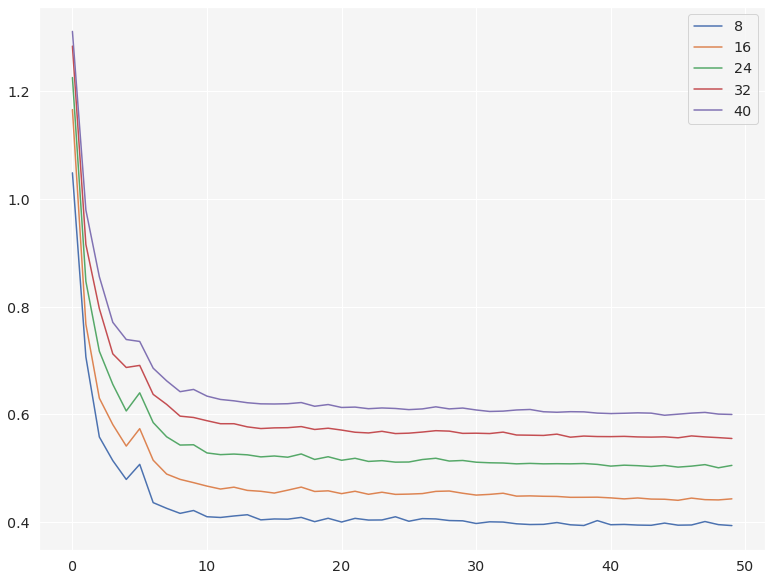

In [114]:
p1 = np.linspace(0, test_exp.final_position,8 + 1)[1:]
p2 = np.linspace(0, test_exp.final_position,16 + 1)[1:]
p3 = np.linspace(0, test_exp.final_position,24 + 1)[1:]
p4 = np.linspace(0, test_exp.final_position,32 + 1)[1:]
p5 = np.linspace(0, test_exp.final_position,40 + 1)[1:]

over = [0, 1, 2, 3, 4]

over[0] = overlap_error(p1, p1*np.sqrt(0.001))
over[1] = overlap_error(p2, p2*np.sqrt(0.001))
over[2] = overlap_error(p3, p3*np.sqrt(0.001))
over[3] = overlap_error(p4, p4*np.sqrt(0.001))
over[4] = overlap_error(p5, p5*np.sqrt(0.001))
func = np.median
plt.plot(func(Data_50_50_t, 0)[0] + overlap_error(p1, p1*np.sqrt(0.001)), label='8')
plt.plot(func(Data_50_50_t, 0)[1] + overlap_error(p2, p2*np.sqrt(0.001)), label='16')
plt.plot(func(Data_50_50_t, 0)[2] + overlap_error(p3, p3*np.sqrt(0.001)), label='24')
plt.plot(func(Data_50_50_t, 0)[3] + overlap_error(p4, p4*np.sqrt(0.001)), label='32')
plt.plot(func(Data_50_50_t, 0)[4] + overlap_error(p5, p5*np.sqrt(0.001)), label='40')
plt.legend()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


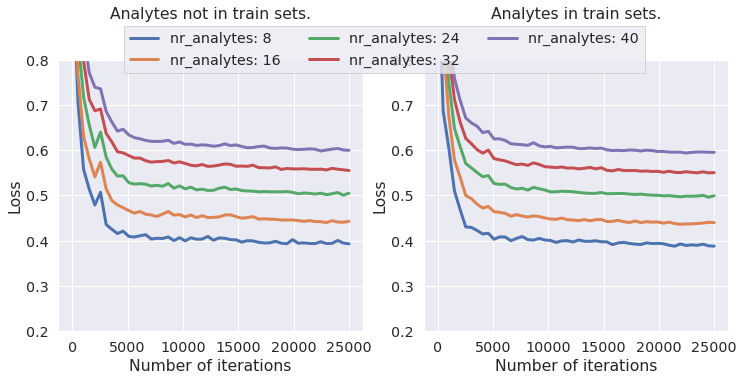

In [115]:
from matplotlib import gridspec
sns.set(style="whitegrid")
sns.set(font_scale=1.3)
plt.rcParams['figure.figsize'] = (12, 5)
func = np.median

plt.subplot(1, 2, 1)
for i in range(5):
    plt.plot(np.linspace(0, 25000, 50),func(Data_50_50_t, 0)[i] + over[i], linewidth=3.)

plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.title('Analytes not in train sets.\n\n')
plt.ylim((.2, .8))


plt.subplot(1, 2, 2)
for i in range(5):
    plt.plot(np.linspace(0, 25000, 50),func(Data_100_t, 0)[i] + over[i], label="nr_analytes: "+str(8 * (i + 1)), linewidth=3.)

plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.title('Analytes in train sets.\n\n')
plt.ylim((.2, .8))


plt.legend(loc='upper right', bbox_to_anchor=(0.75, 1.15),
          ncol=3, fancybox=False, shadow=False)
plt.savefig(f"../results/graphs/GenSet_vs_nr_analytes/GenSet_vs_nr_analytes_10_absolute.eps", bbox_inches='tight', format='eps')

In [ ]:
D = Data_50_50_t
locs = [(0, 0), (0, 2), (1, 0), (1, 2), (2, 1)]
plt.rcParams['figure.figsize'] = (14, 14)
for i in range(5):
    ax = plt.subplot2grid(shape=(3,4), loc=locs[i], colspan=2)
    ax.plot(np.linspace(0, 25000, 50),D[i].T, color="r")
    plt.ylim((0.2, 1.8))
    plt.title(f"Number of analytes: {8*(i+1)}", fontsize=14)
    
    plt.ylabel("Loss")
    if i == 1 or i == 3:
        ax.set_yticklabels([])
        plt.ylabel("")

plt.xlabel("Number of iterations")
#plt.subplots_adjust(hspace = 0.3)
#plt.suptitle("Loss(50/50 train/test split) for the 30 runs for different number of analytes.", fontsize=14)
plt.savefig(f"../results/graphs/GenSet_vs_nr_analytes/GenSet_vs_nr_analytes_30_runs_50_50_t.eps", bbox_inches='tight', format='eps')

### Perf vs arch phi

In [ ]:
data_phi = np.load("../results/general_perf_deep_set_arch_loss_50_50.npz")['losses_50_50']
data_t_phi = np.load("../results/general_perf_deep_set_arch_test_losses_50_50.npz")['test_losses_50_50']

In [ ]:
phi  = []
for i in range(9):
    phi.append([])
    for j in range(20):
        phi[i].append(average_over_equal_intervals(data_phi[i,j], 500))
phi = np.array(phi)

phi_t  = []
for i in range(9):
    phi_t.append([])
    for j in range(20):
        phi_t[i].append(average_over_equal_intervals(data_t_phi[i,j], 500))
phi_t = np.array(phi_t)

In [ ]:
plt.rcParams['figure.figsize'] = (14, 10)
sns.set(font_scale=1.1)
activations = ['ELU', 'ReLU', 'Tanh']
D = phi_t
f = 'mean'
if f == 'mean':
    func = np.mean
    lims = (.27, .7)
if f == 'median':
    func = np.median
    lims = (0.285, .35)
for j in range(3):
    plt.subplot(2, 3, j+1)
    plt.ylim((0.27, 1.3))
    if j == 0:
        plt.ylabel("Loss")
    if j == 1:
        plt.xlabel("Number of iterations")
    for i in range(3):
        plt.plot(np.linspace(0, 25000, 50),func(D, 1)[3*j+i], label="NN width: "+str(5 * (2**i)), linewidth=2.)
    plt.title(f"Non-linearity: {activations[j]}\n")
    
plt.legend(loc='upper right', bbox_to_anchor=(0.2, 1.1),
          ncol=3, fancybox=False, shadow=False)

for j in range(3):
    plt.subplot(2, 3, 3+j+1)
    plt.ylim((0.27, 1.3))
    if j == 0:
        plt.ylabel("Loss")
    if j == 1:
        plt.xlabel("Number of iterations")
    for i in range(3):
        plt.plot(np.linspace(0, 25000, 50),func(D, 1)[j+i*3], label=f"non-linearity: {activations[i]}", linewidth=2.)
    plt.title(f"NN width: {5 * 2 ** j}\n")
    
plt.legend(loc='upper right', bbox_to_anchor=(0.3, 1.1),
          ncol=3, fancybox=False, shadow=False)


plt.subplots_adjust(hspace=0.4)
plt.savefig(f"../results/graphs/GenSet_vs_arch/GenSet_vs_arch_phi_{f}_20_runs_test.eps", bbox_inches='tight', format='eps')

In [ ]:
plt.rcParams['figure.figsize'] = (14, 10)
sns.set(font_scale=1.1)
activations = ['ELU', 'ReLU', 'Tanh']
D = phi
f = 'mean'
if f == 'mean':
    func = np.mean
    lims = (.27, .7)
if f == 'median':
    func = np.median
    lims = (0.285, .35)
for j in range(3):
    plt.subplot(2, 3, j+1)
    plt.ylim((0.27, 1.3))
    if j == 0:
        plt.ylabel("Loss")
    if j == 1:
        plt.xlabel("Number of iterations")
    for i in range(3):
        plt.plot(np.linspace(0, 25000, 50),func(D, 1)[3*j+i], label="NN width: "+str(5 * (2**i)), linewidth=2.)
    plt.title(f"Non-linearity: {activations[j]}\n")
    
plt.legend(loc='upper right', bbox_to_anchor=(0.2, 1.1),
          ncol=3, fancybox=False, shadow=False)

for j in range(3):
    plt.subplot(2, 3, 3+j+1)
    plt.ylim(lims)
    if j == 0:
        plt.ylabel("Loss(zoomed)")
    if j == 1:
        plt.xlabel("Number of iterations")
    for i in range(3):
        plt.plot(np.linspace(0, 25000, 50),func(D, 1)[3*j+i], label="NN width: "+str(5 * (2**i)), linewidth=2.)
    plt.title(f"Non-linearity: {activations[j]}\n")
plt.legend(loc='upper right', bbox_to_anchor=(0.2, 1.1),
          ncol=3, fancybox=False, shadow=False)
plt.subplots_adjust(hspace=0.4)
#plt.savefig(f"../results/graphs/GenSet_vs_arch/GenSet_vs_arch_phi_mean_20_runs_non_lin_vs_width.eps", bbox_inches='tight', format='eps')

In [ ]:
plt.rcParams['figure.figsize'] = (14, 10)
sns.set(font_scale=1.1)
activations = ['ELU', 'ReLU', 'Tanh']
D = phi
f = 'median'
if f == 'mean':
    func = np.mean
    lims = (.27, .7)
if f == 'median':
    func = np.median
    lims = (0.285, .35)
for j in range(3):
    plt.subplot(2, 3, j+1)
    plt.ylim((0.27, 1.3))
    if j == 0:
        plt.ylabel("Loss")
    if j == 1:
        plt.xlabel("Number of iterations")
    for i in range(3):
        plt.plot(np.linspace(0, 25000, 50),func(D, 1)[j+i*3], label=f"non-linearity: {activations[i]}", linewidth=2.)
    plt.title(f"NN width: {5 * 2 ** j}\n")
    
plt.legend(loc='upper right', bbox_to_anchor=(0.3, 1.1),
          ncol=3, fancybox=False, shadow=False)

for j in range(3):
    plt.subplot(2, 3, 3+j+1)
    plt.ylim(lims)
    if j == 0:
        plt.ylabel("Loss(zoomed)")
    if j == 1:
        plt.xlabel("Number of iterations")
    for i in range(3):
        plt.plot(np.linspace(0, 25000, 50),func(D, 1)[j+i*3], label=f"non-linearity: {activations[i]}", linewidth=2.)
    plt.title(f"NN width: {5 * 2 ** j}\n")
plt.legend(loc='upper right', bbox_to_anchor=(0.3, 1.1),
          ncol=3, fancybox=False, shadow=False)
plt.subplots_adjust(hspace=0.4)
#plt.savefig(f"../results/graphs/GenSet_vs_arch/GenSet_vs_arch_phi_{f}_20_runs_width_vs_non_lin.eps", bbox_inches='tight', format='eps')

In [ ]:
activations = ['ELU', 'ReLU', 'Tanh']
D = phi_t
for i in range(3):
    plt.subplot(2, 3, i+1)
    if i == 0:
        plt.ylabel('Loss')
    if i == 1:
        plt.xlabel("Number of iterations")
    plt.plot(np.linspace(0, 25000, 50),D[i*3+2].T, linewidth=2., color='g')
    plt.plot(np.linspace(0, 25000, 50),D[i*3+1].T, linewidth=2., color='b')
    plt.plot(np.linspace(0, 25000, 50),D[i*3].T, linewidth=2., color='r')
    plt.plot(np.linspace(0, 25000, 50),D[i*3+2,0].T, label="NN width: 20", linewidth=2., color='g')
    plt.plot(np.linspace(0, 25000, 50),D[i*3+1,0].T, label="NN width: 10", linewidth=2., color='b')
    plt.plot(np.linspace(0, 25000, 50),D[i*3,0].T, label="NN width: 5", linewidth=2., color='r')
    plt.title(f'Non-linearity: {activations[i]}\n')
    if i == 2:
        plt.legend(loc='upper right', bbox_to_anchor=(0.2, 1.1),
          ncol=3, fancybox=False, shadow=False)
    plt.subplot(2, 3, i+4)
    if i == 0:
        plt.ylabel('Loss')
    if i == 1:
        plt.xlabel("Number of iterations")
    plt.plot(np.linspace(0, 25000, 50),D[i].T, linewidth=2., color='g')
    plt.plot(np.linspace(0, 25000, 50),D[i+3].T, linewidth=2., color='b')
    plt.plot(np.linspace(0, 25000, 50),D[i+6].T, linewidth=2., color='r')
    plt.plot(np.linspace(0, 25000, 50),D[i,0].T, label=f"Non-linearity: {activations[0]}", linewidth=2., color='g')
    plt.plot(np.linspace(0, 25000, 50),D[i+3,0].T, label=f"Non-linearity: {activations[1]}", linewidth=2., color='b')
    plt.plot(np.linspace(0, 25000, 50),D[i+6,0].T, label=f"Non-linearity: {activations[2]}", linewidth=2., color='r')
    if i ==2:
        plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=False, shadow=False)
    plt.title(f'NN width: {5 * 2 **i}\n')
plt.subplots_adjust(hspace=0.4)
plt.savefig(f"../results/graphs/GenSet_vs_arch/GenSet_vs_arch_phi_dist_20_runs_width_vs_non_lin_test.eps", bbox_inches='tight', format='eps')

### Perf vs arch rho

In [ ]:
data_rho = np.load("../results/general_perf_rho_arch_loss_50_50.npz")['losses_50_50']
data_t_rho = np.load("../results/general_perf_rho_arch_test_losses_50_50.npz")['test_losses_50_50']

In [ ]:
rho  = []
for i in range(9):
    rho.append([])
    for j in range(20):
        rho[i].append(average_over_equal_intervals(data_rho[i,j], 500))
rho = np.array(rho)

rho_t  = []
for i in range(9):
    rho_t.append([])
    for j in range(20):
        rho_t[i].append(average_over_equal_intervals(data_t_rho[i,j], 500))
rho_t = np.array(rho_t)

In [ ]:
plt.rcParams['figure.figsize'] = (14, 10)
sns.set(font_scale=1.1)
activations = ['ELU', 'ReLU', 'Tanh']
D = rho_t
f = 'median'
if f == 'mean':
    func = np.mean
    lims = (.27, .8)
if f == 'median':
    func = np.median
    lims = (0.29, .35)
for j in range(3):
    plt.subplot(2, 3, j+1)
    plt.ylim((0.27, 1.4))
    if j == 0:
        plt.ylabel("Loss")
    if j == 1:
        plt.xlabel("Number of iterations")
    for i in range(3):
        plt.plot(np.linspace(0, 25000, 50),func(D, 1)[3*j+i], label="NN width: "+str(5 * (2**i)), linewidth=2.)
    plt.title(f"Non-linearity: {activations[j]}\n")
    
plt.legend(loc='upper right', bbox_to_anchor=(0.2, 1.12),
          ncol=3, fancybox=False, shadow=False)

for j in range(3):
    plt.subplot(2, 3, 3+j+1)
    plt.ylim((0.27, 1.4))
    if j == 0:
        plt.ylabel("Loss")
    if j == 1:
        plt.xlabel("Number of iterations")
    for i in range(3):
        plt.plot(np.linspace(0, 25000, 50),func(D, 1)[j+i*3], label=f"non-linearity: {activations[i]}", linewidth=2.)
    plt.title(f"NN width: {5 * 2 ** j}\n")
    
plt.legend(loc='upper right', bbox_to_anchor=(0.3, 1.1),
          ncol=3, fancybox=False, shadow=False)

plt.subplots_adjust(hspace=0.4)
plt.savefig(f"../results/graphs/GenSet_vs_arch/GenSet_vs_arch_rho_{f}_20_runs_test.eps", bbox_inches='tight', format='eps')

In [ ]:
plt.rcParams['figure.figsize'] = (14, 10)
sns.set(font_scale=1.1)
activations = ['ELU', 'ReLU', 'Tanh']
D = rho_t
f = 'median'
if f == 'mean':
    func = np.mean
    lims = (.27, .8)
if f == 'median':
    func = np.median
    lims = (0.29, .35)
for j in range(3):
    plt.subplot(2, 3, j+1)
    plt.ylim((0.27, 1.4))
    if j == 0:
        plt.ylabel("Loss")
    if j == 1:
        plt.xlabel("Number of iterations")
    for i in range(3):
        plt.plot(np.linspace(0, 25000, 50),func(D, 1)[3*j+i], label="NN width: "+str(5 * (2**i)), linewidth=2.)
    plt.title(f"Non-linearity: {activations[j]}\n")
    
plt.legend(loc='upper right', bbox_to_anchor=(0.2, 1.12),
          ncol=3, fancybox=False, shadow=False)

for j in range(3):
    plt.subplot(2, 3, 3+j+1)
    plt.ylim(lims)
    if j == 0:
        plt.ylabel("Loss(zoomed)")
    if j == 1:
        plt.xlabel("Number of iterations")
    for i in range(3):
        plt.plot(np.linspace(0, 25000, 50),func(D, 1)[3*j+i], label="NN width: "+str(5 * (2**i)), linewidth=2.)
    plt.title(f"Non-linearity: {activations[j]}\n")
plt.legend(loc='upper right', bbox_to_anchor=(0.2, 1.1),
          ncol=3, fancybox=False, shadow=False)
plt.subplots_adjust(hspace=0.4)
#plt.savefig(f"../results/graphs/GenSet_vs_arch/GenSet_vs_arch_rho_{f}_20_runs_non_lin_vs_width.eps", bbox_inches='tight', format='eps')

In [ ]:
plt.rcParams['figure.figsize'] = (14, 10)
sns.set(font_scale=1.1)
activations = ['ELU', 'ReLU', 'Tanh']
D = rho
f = 'mean'
if f == 'mean':
    func = np.mean
    lims = (.27, .95)
if f == 'median':
    func = np.median
    lims = (0.285, .35)
for j in range(3):
    plt.subplot(2, 3, j+1)
    plt.ylim((0.27, 1.4))
    if j == 0:
        plt.ylabel("Loss")
    if j == 1:
        plt.xlabel("Number of iterations")
    for i in range(3):
        plt.plot(np.linspace(0, 25000, 50),func(D, 1)[j+i*3], label=f"non-linearity: {activations[i]}", linewidth=2.)
    plt.title(f"NN width: {5 * 2 ** j}\n")
    
plt.legend(loc='upper right', bbox_to_anchor=(0.3, 1.1),
          ncol=3, fancybox=False, shadow=False)

for j in range(3):
    plt.subplot(2, 3, 3+j+1)
    plt.ylim(lims)
    if j == 0:
        plt.ylabel("Loss(zoomed)")
    if j == 1:
        plt.xlabel("Number of iterations")
    for i in range(3):
        plt.plot(np.linspace(0, 25000, 50),func(D, 1)[j+i*3], label=f"non-linearity: {activations[i]}", linewidth=2.)
    plt.title(f"NN width: {5 * 2 ** j}\n")
plt.legend(loc='upper right', bbox_to_anchor=(0.3, 1.1),
          ncol=3, fancybox=False, shadow=False)
plt.subplots_adjust(hspace=0.4)
#plt.savefig(f"../results/graphs/GenSet_vs_arch/GenSet_vs_arch_rho_{f}_20_runs_width_vs_non_lin.eps", bbox_inches='tight', format='eps')

In [ ]:
activations = ['ELU', 'ReLU', 'Tanh']
D = rho
for i in range(3):
    plt.subplot(2, 3, i+1)
    if i == 0:
        plt.ylabel('Loss')
    if i == 1:
        plt.xlabel("Number of iterations")
    plt.plot(np.linspace(0, 25000, 50),D[i*3+2].T, linewidth=2., color='g')
    plt.plot(np.linspace(0, 25000, 50),D[i*3+1].T, linewidth=2., color='b')
    plt.plot(np.linspace(0, 25000, 50),D[i*3].T, linewidth=2., color='r')
    plt.plot(np.linspace(0, 25000, 50),D[i*3+2,0].T, label="NN width: 20", linewidth=2., color='g')
    plt.plot(np.linspace(0, 25000, 50),D[i*3+1,0].T, label="NN width: 10", linewidth=2., color='b')
    plt.plot(np.linspace(0, 25000, 50),D[i*3,0].T, label="NN width: 5", linewidth=2., color='r')
    plt.title(f'Non-linearity: {activations[i]}\n')
    #print(plt.gca().get_ylim())
    if i == 2:
        plt.ylim((0.21, 1.75))
        plt.legend(loc='upper right', bbox_to_anchor=(0.2, 1.1),
          ncol=3, fancybox=False, shadow=False)
    plt.subplot(2, 3, i+4)
    if i == 0:
        plt.ylabel('Loss')
    if i == 1:
        plt.xlabel("Number of iterations")
    plt.plot(np.linspace(0, 25000, 50),D[i].T, linewidth=2., color='g')
    plt.plot(np.linspace(0, 25000, 50),D[i+3].T, linewidth=2., color='b')
    plt.plot(np.linspace(0, 25000, 50),D[i+6].T, linewidth=2., color='r')
    plt.plot(np.linspace(0, 25000, 50),D[i,0].T, label=f"Non-linearity: {activations[0]}", linewidth=2., color='g')
    plt.plot(np.linspace(0, 25000, 50),D[i+3,0].T, label=f"Non-linearity: {activations[1]}", linewidth=2., color='b')
    plt.plot(np.linspace(0, 25000, 50),D[i+6,0].T, label=f"Non-linearity: {activations[2]}", linewidth=2., color='r')
    if i ==2:
        plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=False, shadow=False)
    plt.title(f'NN width: {5 * 2 **i}\n')
plt.subplots_adjust(hspace=0.4)
plt.savefig(f"../results/graphs/GenSet_vs_arch/GenSet_vs_arch_rho_dist_20_runs_width_vs_non_lin.eps", bbox_inches='tight', format='eps')

### Final Distributions

In [ ]:
D_oneset = np.load("../results/distribution_single_const_3_steps.npz")
D_onesettau = np.load("../results/distribution_single_var_3_steps.npz")
D_genset_not = np.load("../results/general_dist_not_in_train_3.npz")
D_genset = np.load("../results/general_dist_in_train_3.npz")

temp1 = {}
temp1['nr_analytes_8'] = D_genset['dist_8']
temp1['nr_analytes_16'] = D_genset['dist_16']
temp1['nr_analytes_32'] = D_genset['dist_32']
temp2 = {}
temp2['nr_analytes_8'] = D_genset['dist_ft_8']
temp2['nr_analytes_16'] = D_genset['dist_ft_16']
temp2['nr_analytes_32'] = D_genset['dist_ft_32']
temp3 = {}
temp3['nr_analytes_8'] = D_genset_not['dist_8']
temp3['nr_analytes_16'] = D_genset_not['dist_16']
temp3['nr_analytes_32'] = D_genset_not['dist_32']
temp4 = {}
temp4['nr_analytes_8'] = D_genset_not['dist_ft_8']
temp4['nr_analytes_16'] = D_genset_not['dist_ft_16']
temp4['nr_analytes_32'] = D_genset_not['dist_ft_32']

D = {}
D[0] = D_oneset
D[1] = D_onesettau
D[2] = temp1
D[3] = temp3
D[4] = temp2
D[5] = temp4

In [ ]:
plt.rcParams.update({'font.size': 30, 'figure.figsize' : (12, 19)})
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
my_set = 8
m = 'Model: OneSet\n'
n = 'Model: OneSetTau\n'
model = ['OneSet', 'OneSetTau', 'GenSet(set in training)', 
         'GenSet(set not in training)', 'GenSet(set in training) + FineTuning',
         'GenSet(set not in training) + FineTuning']
        

fig, ax = plt.subplots(3, 2, sharex=True, sharey=True)
a_set = f'nr_analytes_{my_set}'
scale = 'linear'
for i in range(6):
    if i == 0:
        bins = 2
    elif i // 2 == 0:
        bins = 10
    elif i // 2 == 1:
        bins = 10
    elif i == 4:
        bins = 30
    else:
        bins = 30
    ax[i//2][i % 2].hist(D[i][a_set], bins=bins)
    ax[i//2][i % 2].xaxis.set_tick_params(which='both', labelbottom=True)
    ax[i//2][i % 2].set_yscale(scale)
    ax[i//2][i % 2].set_title(f"Model: {model[i]}\nMean: {round(np.mean(D[i][a_set]), 3)}\nMedian: {round(np.median(D[i][a_set]), 3)}\nStandard Deviation: {round(np.std(D[i][a_set]), 3)}")
    

plt.subplots_adjust(hspace=0.3)
#plt.savefig(f"../results/graphs/Distribution_results/Dist_a_set_{my_set}_10.eps", format='eps') 

In [ ]:


#plt.savefig(f"../results/graphs/Distribution_results/OneSet_vs_OneSetTau_log.eps", format='eps')

In [ ]:
loss = 3.
exp = exp_32
delta_taus = [.5, .5]
for phi_1 in np.linspace(0, 1, 200):
    for phi_2 in np.linspace(0, 1, 200):
        exp.reset()
        exp.run_all([phi_1, phi_2], delta_taus)
        if exp.loss() < loss:
            loss = exp.loss()
            best_2 = [phi_1, phi_2]

In [ ]:
best_2

In [ ]:
from chromatography import ExperimentAnalytes
exp_8 = ExperimentAnalytes(k0 = alists[0].k0.values, S = alists[0].S.values, h=0.001, run_time=1.0)
exp_16 = ExperimentAnalytes(k0 = alists[1].k0.values, S = alists[1].S.values, h=0.001, run_time=1.0)
exp_32 = ExperimentAnalytes(k0 = alists[2].k0.values, S = alists[2].S.values, h=0.001, run_time=1.0)


In [ ]:
x, y, L = loss_field(exp_8, [0.5, 0.5], N = 400)

In [ ]:
plt.rcParams.update({'font.size': 30, 'figure.figsize' : (7, 6)})
plt.contourf(x, y, L, levels=100)
plt.colorbar()
plt.xlabel("Phi1")
plt.ylabel("Phi2")
plt.title("Number of analytes: 8\nGlobal minumum at: (0.50, 0.76)")
plt.savefig(f"../results/graphs/Distribution_results/loss_field_set_8.eps", format='eps')

In [ ]:
alists = []
alists.append(pd.read_csv(f'../data/GilarSample.csv'))
alists.append(pd.read_csv(f'../data/Alizarin.csv'))
alists.append(pd.read_csv(f'../data/Peterpeptides.csv'))
alists.append(pd.read_csv(f'../data/Roca.csv'))
alists.append(pd.read_csv(f'../data/Peter32.csv'))
alists.append(pd.read_csv(f'../data/Eosin.csv'))
alists.append(pd.read_csv(f'../data/Controlmix2.csv'))
alists.append(pd.read_csv('../data/Gooding.csv'))
# GilarSample - 8 analytes
# Peterpeptides - 32 analytes
# Roca - 14 analytes
# Peter32 - 32 analytes
# Eosin - 20 analytes
# Alizarin - 16 analytes
# Controlmix2 - 17 analytes
# Gooding - 872 analytes

In [ ]:
import string
sns.set()
plt.rcParams['figure.figsize'] = (12, 14)
i = 1
for alist in alists:
    plt.subplot(4, 2, i)
    sns.scatterplot(data=alists[i-1], x='S', y='lnk0')
    plt.title(f"({list(string.ascii_lowercase)[i-1]}) Number of analytes: {len(alists[i-1].index)}")
    i += 1
plt.subplots_adjust(hspace=0.5)
plt.savefig(f"../results/graphs/sets.eps", bbox_inches='tight', format='eps')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib qt

In [ ]:
x = np.linspace(0, 10, 1000)
plt.rcParams['figure.figsize'] = 6, 5
params = {'legend.fontsize': 14,
          'legend.handlelength': 2}
plt.rcParams.update(params)
ax= plt.subplot(1,2,1)
plt.plot(x, np.sin(x*2)*x, label="Reward Distribution", linewidth=3)
plt.plot(x, 20*stats.norm.pdf(x, 5, 1)+10, label='Action probability distribution', linewidth=3)
plt.plot(x, np.zeros(x.shape),'--k', label='Reward = 0')
plt.axis('off')
plt.ylim((-10, 22))
ax.legend(loc='upper left', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=False, shadow=False)
#plt.legend()
plt.subplot(1,2,2)
plt.plot(x, np.sin(x*2)*x*stats.norm.pdf(x, 5, 1) + 5, color="green", linewidth=3)
plt.plot(x, np.zeros(x.shape) + 5,'--k')
plt.axis('off')
plt.ylim((-10, 22))

plt.savefig("shit1.png")


In [ ]:
x = np.linspace(0, 10, 1000)
plt.rcParams['figure.figsize'] = 6, 5
params = {'legend.fontsize': 14,
          'legend.handlelength': 2}
plt.rcParams.update(params)
ax= plt.subplot(1,2,1)
plt.plot(x, np.sin(x*2)*x, label="Reward Distribution", linewidth=3)
plt.plot(x, 5 * stats.norm.pdf(x, 7, 0.3) +10, label='Action probability distribution', linewidth=3)
plt.plot(x, np.zeros(x.shape),'--k', label='Reward = 0')
plt.axis('off')
plt.ylim((-10, 22))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=False, shadow=False)
#plt.legend()
plt.subplot(1,2,2)
plt.plot(x, np.sin(x*2)*x*stats.norm.pdf(x, 7, 0.3) + 5, color="green", linewidth=3)
plt.plot(x, np.zeros(x.shape) + 5,'--k')
plt.axis('off')
plt.ylim((-10, 22))
plt.savefig("shit2.png")

In [ ]:
x = np.linspace(0, 10, 1000)
plt.rcParams['figure.figsize'] = 6, 5
params = {'legend.fontsize': 14,
          'legend.handlelength': 2}
plt.rcParams.update(params)
ax= plt.subplot(1,4,1)
plt.plot(x, np.sin(x*2)*x, label="Reward Distribution", linewidth=3)
plt.plot(x, 20*stats.norm.pdf(x, 5.5, 1)+10, label='Action probability distribution', linewidth=3)
plt.plot(x, np.zeros(x.shape),'--k', label='Reward = 0')
plt.axis('off')
plt.ylim((-10, 22))
ax.legend(loc='upper left', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=False, shadow=False)
#plt.legend()
plt.subplot(1,4,2)
plt.plot(x, np.sin(x*2)*x*stats.norm.pdf(x, 5.5, 1) + 5, color="green", linewidth=3)
plt.plot(x, np.zeros(x.shape) + 5,'--k')
plt.axis('off')
plt.ylim((-10, 22))

x = np.linspace(0, 10, 1000)
plt.rcParams['figure.figsize'] = 6, 5
params = {'legend.fontsize': 14,
          'legend.handlelength': 2}
plt.rcParams.update(params)
ax= plt.subplot(1,4,3)
plt.plot(x, np.sin(x*2)*x, label="Reward Distribution", linewidth=3)
plt.plot(x, 5 * stats.norm.pdf(x, 7, 0.3) +10, label='Action probability distribution', linewidth=3)
plt.plot(x, np.zeros(x.shape),'--k', label='Reward = 0')
plt.axis('off')
plt.ylim((-10, 22))

plt.subplot(1,4,4)
plt.plot(x, np.sin(x*2)*x*stats.norm.pdf(x, 7, 0.3) + 5, color="green", linewidth=3)
plt.plot(x, np.zeros(x.shape) + 5,'--k')
plt.axis('off')
plt.ylim((-10, 22))
#plt.savefig("shit2.png")


In [120]:
ft_time = np.loadtxt("../results/time_genset_plus_ft.txt")
ft_time

array([338.64011105, 424.80387602])

In [123]:
#best_loss_gs=best_loss_gs, 
#grid_search_time_ms=grid_search_time_ms, 
#rl_time_ms=rl_time_ms
l = np.load("../results/grid_search.npz")['rl_time_ms']
l.mean(0)

array([ 51.26883442, 149.15262485, 154.25206693, 160.22047594])

In [124]:
ft_time[1] - ft_time[0]

86.16376496305162

In [125]:
338//60

5

In [ ]:
5min 39sec